### Seaborn Barplot : Categorical estimate plot

#### Typically with Seaborn Barplot, we pass one category and one numerical variable as `X` and `Y`

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


In [2]:
pen = sns.load_dataset('penguins')

pen.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
with plt.style.context('fivethirtyeight'):
    sns.barplot(data=pen, y='body_mass_g', x='species')

plt.show()

<img src='./plots/bar-plot-1.png'>

#### Seaborn bar plot groups the data and give us summary
#### here data is grouped using the species and we are shown the average `body_mass_g`

#### we can replicate the same using pandas as matplotlib  

In [15]:
pen.groupby('species')['body_mass_g'].mean().plot(kind='bar', cmap='winter')

<img src='./plots/bar-plot-2.png'>

### confidence interval

In [17]:
with plt.style.context('fivethirtyeight'):

                                                            # NO CI
    sns.barplot(data=pen, y='body_mass_g', x='species', errorbar=None)

plt.show()

<img src='./plots/bar-plot-3.png'>

### 95 % Confidence interval

In [19]:
with plt.style.context('fivethirtyeight'):
    sns.barplot(data=pen, y='body_mass_g', x='species', errorbar=('ci', 95))

plt.show()

<img src='./plots/bar-plot-4.png'>

### Estimator

In [20]:
pen.groupby('species').body_mass_g.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0


### what is the std for  `body_mass_g` across different species and how it varies [95% CI]

In [22]:
with plt.style.context('fivethirtyeight'):
    sns.barplot(data=pen, y='body_mass_g', x='species', estimator=np.std)

plt.show()

<img src='./plots/bar-plot-5.png'>

* what is the maximum `body_mass_g` for different species and how it varies [95% CI]

In [24]:
with plt.style.context('fivethirtyeight'):
    sns.barplot(data=pen, y='body_mass_g', x='species', estimator=np.max)

plt.show()

<img src='./plots/bar-plot-7.png'>

## Additional categories

### categories | hue

In [26]:
with plt.style.context('fivethirtyeight'):
    sns.barplot(data=pen, y='body_mass_g', x='species', hue='sex')


plt.show()

<img src='./plots/bar-plot-8.png'>

### order , hue_order

In [28]:
with plt.style.context('fivethirtyeight'):
    sns.barplot(data=pen, y='body_mass_g', x='species', hue='sex', order=['Chinstrap', 'Adelie', 'Gentoo'])


plt.show()

<img src='./plots/bar-plot-9.png'>

In [30]:
with plt.style.context('fivethirtyeight'):
    sns.barplot(
        data=pen, y='body_mass_g', x='species', hue='sex', 
        order=['Chinstrap', 'Adelie', 'Gentoo'], hue_order=['Female', 'Male'])


plt.show()

<img src='./plots/bar-plot-10.png'>

### error color and width

### `errwidth`

In [32]:
with plt.style.context('fivethirtyeight'):
    sns.barplot(
        data=pen, y='body_mass_g', x='species', hue='sex', errcolor='red', errwidth=5)


plt.show()

<img src='./plots/bar-plot-11.png'>

#### `errcolor='black', errwidth=5`

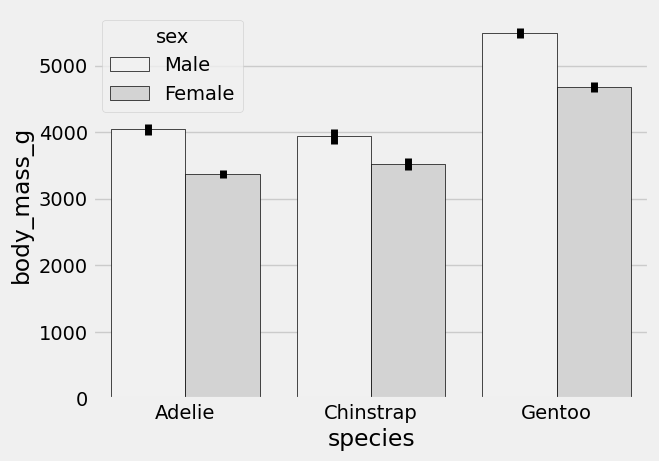

In [24]:
with plt.style.context('fivethirtyeight'):
    sns.barplot(
        data=pen, y='body_mass_g', x='species', hue='sex',
        color='lightgray', edgecolor='black', 
        errcolor='black', errwidth=5)


plt.show()

In [33]:
pen[['body_mass_g', 'species',	'sex']].groupby(['species','sex']).mean()

body_mass_g
species   sex                
Adelie    Female  3368.835616
          Male    4043.493151
Chinstrap Female  3527.205882
          Male    3938.970588
Gentoo    Female  4679.741379
          Male    5484.836066

### Lets plot this 

In [39]:
pen[['body_mass_g', 'species',	'sex']].groupby(['species','sex']).mean().plot(kind='bar');
plt.show()

<img src='./plots/bar-plot-12.png'>

### Thats not what we want -- make it more interesting

In [40]:
pen[['body_mass_g', 'species',	'sex']].groupby(['species','sex']).mean().unstack(level=0)

body_mass_g                          
species       Adelie    Chinstrap       Gentoo
sex                                           
Female   3368.835616  3527.205882  4679.741379
Male     4043.493151  3938.970588  5484.836066

In [43]:
pen[['body_mass_g', 'species',	'sex']].groupby(['species','sex']).mean().unstack(level=0).plot(kind='bar')

<img src='./plots/bar-plot-13.png'>

### We need species on the `X axis`

In [42]:
pen[['body_mass_g', 'species',	'sex']].groupby(['species','sex']).mean().unstack(level=1)

body_mass_g             
sex             Female         Male
species                            
Adelie     3368.835616  4043.493151
Chinstrap  3527.205882  3938.970588
Gentoo     4679.741379  5484.836066

In [44]:
pen[['body_mass_g', 'species',	'sex']].groupby(['species','sex']).mean().unstack(level=1).plot(kind='bar')

<img src='./plots/bar-plot-14.png'>

In [37]:
pen[['body_mass_g', 'species',	'sex']].groupby(['species','sex']).mean().unstack(level=1)

body_mass_g             
sex             Female         Male
species                            
Adelie     3368.835616  4043.493151
Chinstrap  3527.205882  3938.970588
Gentoo     4679.741379  5484.836066

In [45]:
pen[['body_mass_g', 'species',	'sex']].groupby(['species','sex']).mean().unstack(level=1).plot(kind='bar');
plt.show();

<img src='./plots/bar-plot-16.png'>

In [47]:
(pen[['body_mass_g', 'species',	'sex']]
 .groupby(['species','sex'])
 .mean()
 .unstack(level=1)
 .plot(kind='bar', stacked=True)) 
plt.show();

<img src='./plots/bar-plot-17.png'>